In [12]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
data = pd.read_csv("gym_exercise_dataset.csv")
data.head(5)

,Exercise Name,Equipment,Variation,Utility,Mechanics,Force,Preparation,Execution,Target_Muscles,Synergist_Muscles,Stabilizer_Muscles,Antagonist_Muscles,Dynamic_Stabilizer_Muscles,Main_muscle,Difficulty (1-5),Secondary Muscles,parent_id
0,Neck Flexion,Cable,No,Basic or Auxiliary,Isolated,Pull,Sit on bench facing away from middle pulley. P...,Move head away from pulley by bending neck for...,"Sternocleidomastoid,","None,","Rectus Abdominis, Obliques,",NaN,NaN,Neck,2,Sternocleidomastoid,NaN
1,Neck Flexion,Lever (plate loaded),No,Basic or Auxiliary,Isolated,Pull,Sit on seat in machine. Position padded lever ...,Move head forward by flexing neck until chin t...,"Sternocleidomastoid,","None,","Latissimus Dorsi, Deltoid, Posterior, Rhomboid...",NaN,NaN,Neck,2,Sternocleidomastoid,NaN
2,Lateral Neck Flexion,Lever (plate loaded),No,Auxiliary,Isolated,Pull,Sit on seat in machine with feet apart . Pos...,Move head down to side by laterally flexing ne...,"Sternocleidomastoid,","Splenius, Erector Spinae, Levator Scapulae, Tr...","Latissimus Dorsi, Pectoralis Major, Sternal, P...",NaN,NaN,Neck,2,"Sternocleidomastoid, Levator Scapulae",NaN
3,Neck Flexion,Lever (selectorized),No,Basic or Auxiliary,Isolated,Pull,Sit on seat in machine. Position padded lever ...,Move head forward by flexing neck until chin t...,"Sternocleidomastoid,","None,","Latissimus Dorsi, Deltoid, Posterior, Rhomboid...",NaN,NaN,Neck,2,Sternocleidomastoid,NaN
4,Lateral Neck Flexion,Lever (selectorized),No,Auxiliary,Isolated,Pull,Sit on seat in machine with feet apart. Positi...,Move head down to side by laterally flexing ne...,"Sternocleidomastoid,","Splenius, Erector Spinae, Levator Scapulae, Tr...","Latissimus Dorsi, Pectoralis Major, Sternal, P...",NaN,NaN,Neck,2,"Sternocleidomastoid, Levator Scapulae",NaN


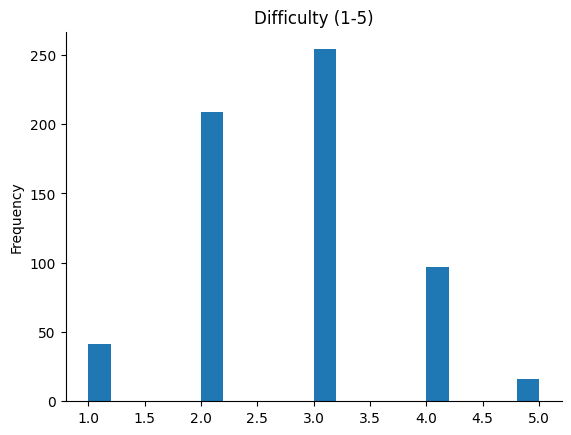

In [6]:
# @title Difficulty (1-5)

from matplotlib import pyplot as plt
data['Difficulty (1-5)'].plot(kind='hist', bins=20, title='Difficulty (1-5)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
columns_to_drop = [
    "Preparation", "Execution", "Antagonist_Muscles",
    "Dynamic_Stabilizer_Muscles", "parent_id"
]
data_cleaned = data.drop(columns=columns_to_drop)

# Handle missing values by filling with 'Unknown' for categorical data
data_cleaned.fillna({"Variation": "Unknown", "Synergist_Muscles": "Unknown", "Stabilizer_Muscles": "Unknown"}, inplace=True)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Step 4: Define features (X) and target (y)
X = data_cleaned.drop(columns=["Difficulty (1-5)"])
y = data_cleaned["Difficulty (1-5)"]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Select only object (string) columns for encoding
object_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding to each object column
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Model trained successfully!
Mean Squared Error (MSE): 0.16352661290322582
R² Score: 0.7794979215995791


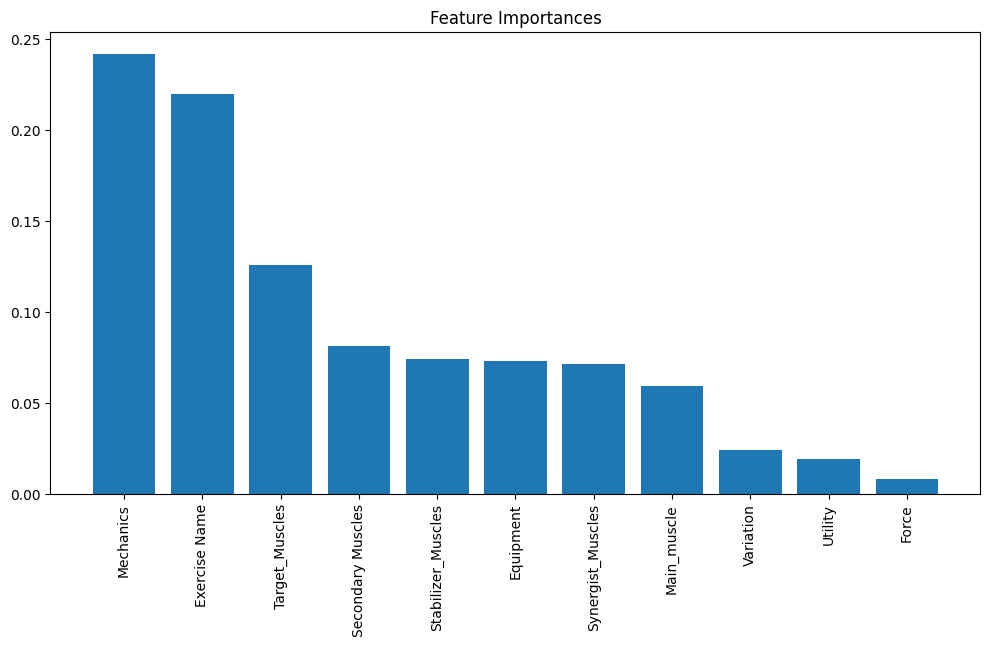

Prediction for the new data: [3.01]


In [11]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Step 8: Feature importance (optional analysis)
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
features = data_cleaned.drop(columns=["Difficulty (1-5)"]).columns

# Plot feature importances
plt.figure(figsize=(12, 6))
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("Feature Importances")
plt.show()

# Step 9: Make predictions on new data (example)
new_data = X_test[:1]  # Replace with actual new data in the same format as X
prediction = model.predict(new_data)
print(f"Prediction for the new data: {prediction}")